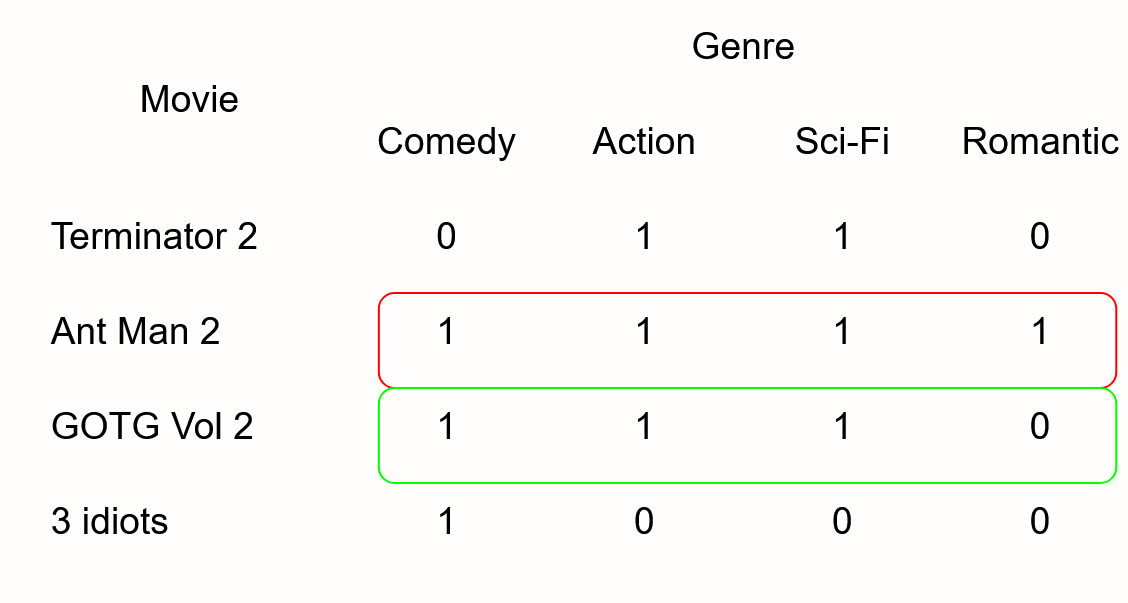

In [1]:
import pandas as pd
import numpy as np

In [2]:
df  = pd.DataFrame(
    data = [[0,1,1,0],[1,1,1,1],[1,1,1,0],[1,0,0,0]],
    columns = ['comedy','action', 'scifi', 'romantic'],
    index = ['terminator2','antman2', 'gotgvol2','3idiots']
)
df.head()

,comedy,action,scifi,romantic
terminator2,0,1,1,0
antman2,1,1,1,1
gotgvol2,1,1,1,0
3idiots,1,0,0,0


Rumus Cosine Similarity

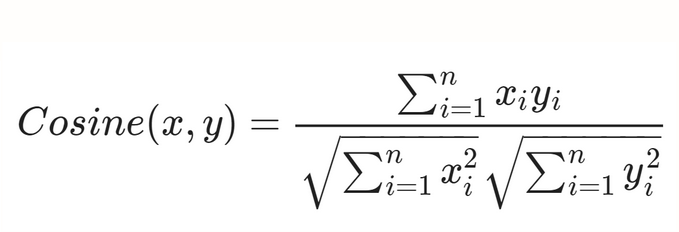|

In [3]:
# (1*1)+(1*1)+(1*1)+(1*0) / np.sqrt(1**2+1**2+1**2+1**2)*np.sqrt(1**2+1**2+1**2+0**2)

In [4]:
def cosine_similarity(x, y):
    pembilang = 0
    penyebut = 0
    if len(x) == len(y):
        for i in range(0, len(x)):
            pembilang = pembilang+(x[i]*y[i])
        penyebut = np.sqrt(np.sum(np.apply_along_axis(lambda k: k**2,axis=0, arr=x)))*np.sqrt(np.sum(np.apply_along_axis(lambda k: k**2,axis=0, arr=y)))
        return(pembilang/penyebut)
    else:
        return(pembilang/penyebut)

cosine_similarity(df.loc['antman2'], df.loc['3idiots'])

0.5

Explore "Wine Recommendation"

In [5]:
df_wine = pd.read_csv("white_wine.csv")
df_wine = df_wine[0:10]

In [6]:
similarity_matrix = []
for i in range(0, len(df_wine)):
    temp_column = []
    for j in range(i, len(df_wine)):
        temp_column.append(cosine_similarity(df_wine.loc[i], df_wine.loc[j]))
    similarity_matrix.append(temp_column)


In [7]:
for i in range(0, len(similarity_matrix)):
    if len(similarity_matrix[i]) < len(similarity_matrix[0]):
        for j in range(0, len(similarity_matrix[0]) - len(similarity_matrix[i])):
            similarity_matrix[i].insert(j, 0)

print(similarity_matrix)

[[0.9999999999999998, 0.9826332291628472, 0.9955607165908145, 0.9972885195824981, 0.9972885195824981, 0.9955607165908145, 0.9966685276797801, 0.9999999999999998, 0.9826332291628472, 0.9925777616103227], [0, 0.9999999999999996, 0.9789898573405424, 0.9891493474340869, 0.9891493474340869, 0.9789898573405424, 0.9931289121991451, 0.9826332291628472, 0.9999999999999996, 0.9940711689387105], [0, 0, 1.0, 0.9958918294416681, 0.9958918294416681, 1.0, 0.9952589103366667, 0.9955607165908145, 0.9789898573405424, 0.9943856244977526], [0, 0, 0, 0.9999999999999996, 0.9999999999999996, 0.9958918294416681, 0.9992627689171248, 0.9972885195824981, 0.9891493474340869, 0.997990197333383], [0, 0, 0, 0, 0.9999999999999996, 0.9958918294416681, 0.9992627689171248, 0.9972885195824981, 0.9891493474340869, 0.997990197333383], [0, 0, 0, 0, 0, 1.0, 0.9952589103366667, 0.9955607165908145, 0.9789898573405424, 0.9943856244977526], [0, 0, 0, 0, 0, 0, 0.9999999999999998, 0.9966685276797801, 0.9931289121991451, 0.99899878

In [8]:
df_similarity = pd.DataFrame(data=similarity_matrix,
                             columns = [x for x in range(0, 10)], 
                             index = [x for x in range(0,10)])
df_similarity.head()

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.982633,0.995561,0.997289,0.997289,0.995561,0.996669,1.000000,0.982633,0.992578
1,0.0,1.000000,0.978990,0.989149,0.989149,0.978990,0.993129,0.982633,1.000000,0.994071
2,0.0,0.000000,1.000000,0.995892,0.995892,1.000000,0.995259,0.995561,0.978990,0.994386
3,0.0,0.000000,0.000000,1.000000,1.000000,0.995892,0.999263,0.997289,0.989149,0.997990
4,0.0,0.000000,0.000000,0.000000,1.000000,0.995892,0.999263,0.997289,0.989149,0.997990


In [9]:
produk_dicari = 0
skor_kemiripan = 0.97
print(df_similarity[(df_similarity>skor_kemiripan) & (df_similarity<0.99)].loc[0])

0         NaN
1    0.982633
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8    0.982633
9         NaN
Name: 0, dtype: float64


In [10]:
df_wine.loc[8]

fixed acidity             6.300
volatile acidity          0.300
citric acid               0.340
residual sugar            1.600
chlorides                 0.049
free sulfur dioxide      14.000
total sulfur dioxide    132.000
density                   0.994
pH                        3.300
sulphates                 0.490
alcohol                   9.500
quality                   6.000
Name: 8, dtype: float64

In [11]:
df_wine.loc[0]

fixed acidity             7.000
volatile acidity          0.270
citric acid               0.360
residual sugar           20.700
chlorides                 0.045
free sulfur dioxide      45.000
total sulfur dioxide    170.000
density                   1.001
pH                        3.000
sulphates                 0.450
alcohol                   8.800
quality                   6.000
Name: 0, dtype: float64